In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install wordcloud

In [3]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textwrap import wrap

import numpy as np
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble,svm
from sklearn.ensemble import RandomForestClassifier



In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score

In [5]:
data = pd.read_csv(r"C:\Users\aadit\Downloads\Dataset-SA.csv")

In [6]:
# Printing the first 5 rows of the dataset
data.head()


product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [8]:
data.describe

<bound method NDFrame.describe of                                              product_name product_price Rate  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
...                                                   ...           ...  ...   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    3   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    4   

     

In [9]:
print(data.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [10]:
data = data.dropna(axis=0)
print(data.isnull().sum())

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


In [11]:
data['Rate'] = pd.to_numeric(data['Rate'], errors='coerce')

In [12]:
#removing  any duplicate values
display(data.drop_duplicates())

product_name product_price  Rate  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   5.0   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   5.0   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   3.0   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   1.0   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   3.0   
...                                                   ...           ...   ...   
205045  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   5.0   
205046  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   5.0   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   3.0   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   5.0   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   4.0   

                 Review                                            Summary  \
0                super!  great cooler excellent air flow and for this p...   
1               awesome              best budget 2 fit cooler nice cooling   
2                  fair  the quality is good but the power of air is de...   
3       useless product                  very bad product its a only a fan   
4                  fair                                      ok ok product   
...                 ...                                                ...   
205045         terrific                              good quality products   
205046   classy product                            beautiful set very nice   
205049             nice                        very nice and fast delivery   
205050        just wow!                                    awesome product   
205051  value-for-money  very good but mixing bowl not included is one ...   

       Sentiment  
0       positive  
1       positive  
2       positive  
3       negative  
4        neutral  
...          ...  
205045  positive  
205046  positive  
205049  positive  
205050  positive  
205051   neutral  

[154467 rows x 6 columns]

In [13]:
#Removing common words like 'a, an, the' using 'stopwords'

import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
stemmer = nltk.SnowballStemmer('english')

from nltk.corpus import stopwords
import string

stopword = set(stopwords.words('english'))

In [15]:
#Creating a function called 'clean' to clean up any unwanted information (like emojis) from the Review column

import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stopword = stopwords.words('english')

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.split(' ')
    text = [stemmer.stem(word) for word in text if word not in stopword]
    text = " ".join(text)
    return text

data["Review"] = data["Review"].apply(clean)


In [16]:
# Filter data to keep only the desired categories
ratings_to_keep = [1, 2, 3, 4, 5]
filtered_data = data[data['Rate'].isin(ratings_to_keep)]

# Get the count of each rating
rating_counts = filtered_data['Rate'].value_counts()
ratings = data['Rate'].value_counts()
numbers = ratings.index
quantity = ratings.values


In [17]:
import plotly.express as px

figure = px.pie(data,
               values=quantity,
               names=numbers,hole = 0)
figure.show()

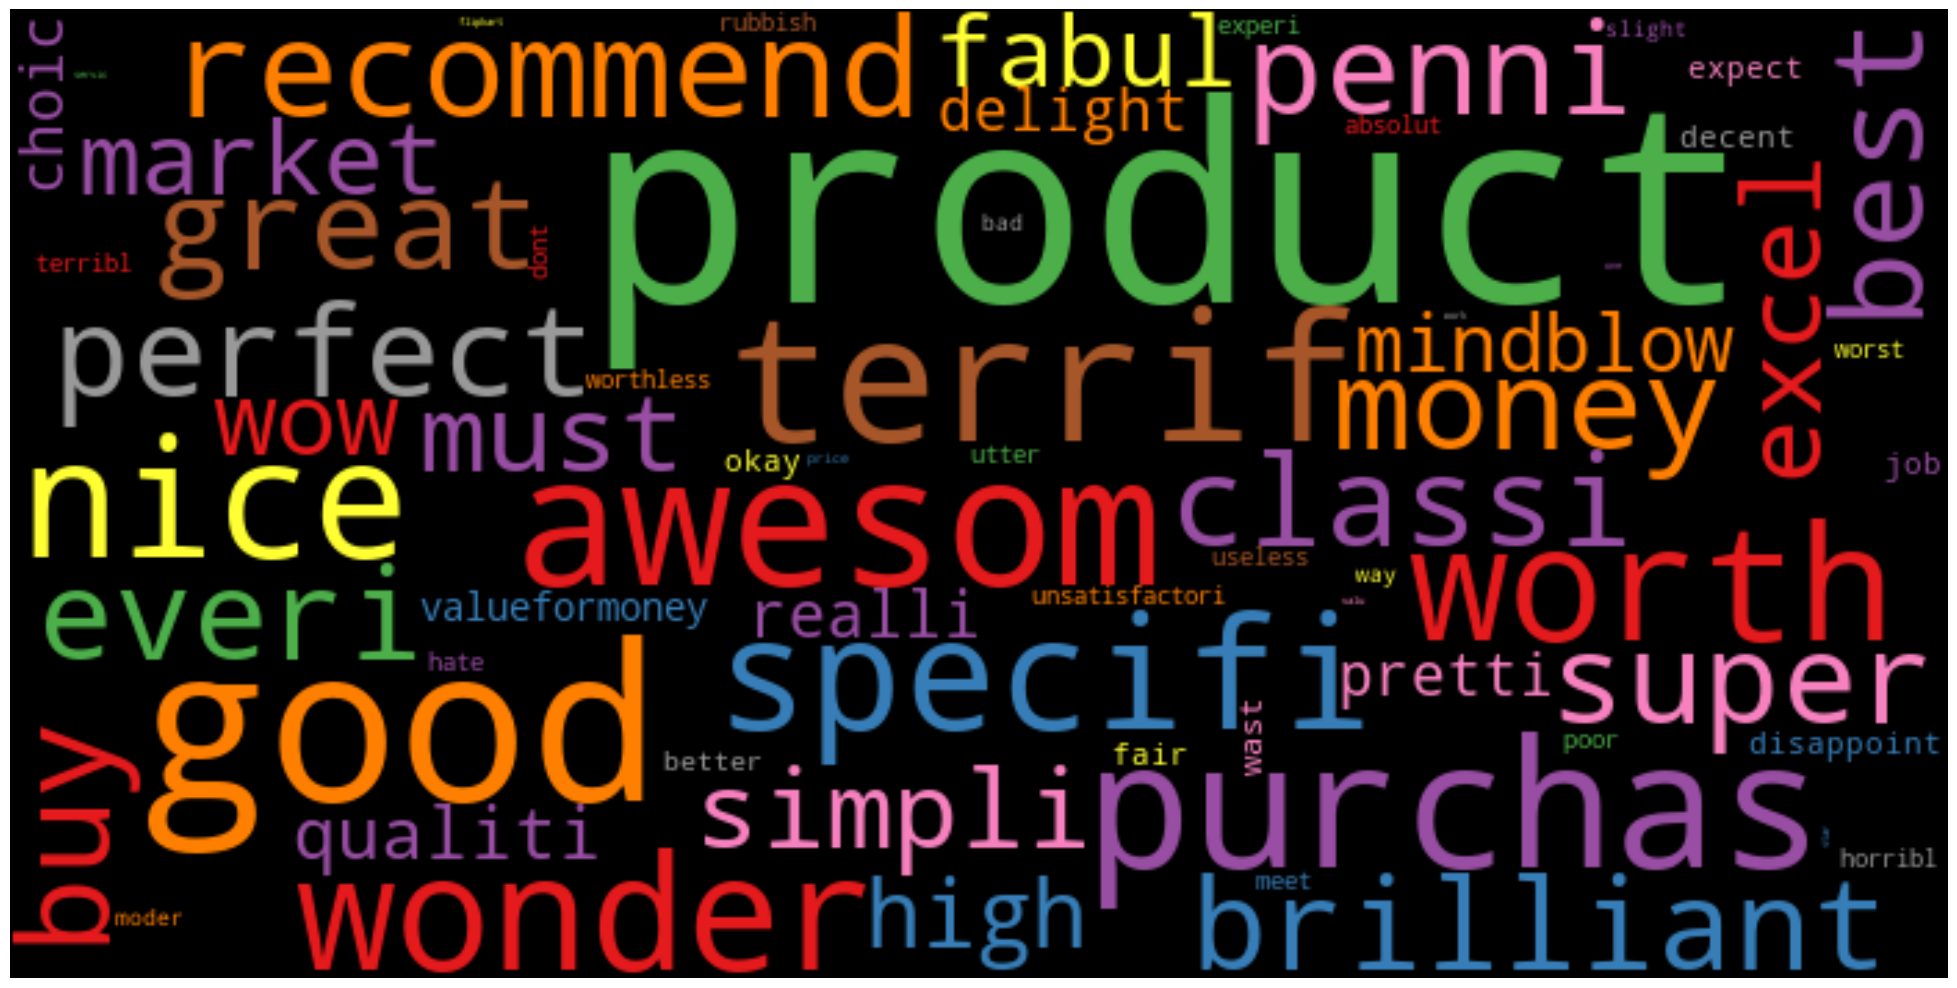

In [18]:

#creating  a wordcloud, the largest words are most used

text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width = 700, height = 350, 
                      random_state=1, colormap='Set1', collocations=False, 
                      max_font_size=100, max_words=100, background_color='black').generate(text)
plt.figure( figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2, random_state=42)


# Convert text data into numerical vectors using Bag-of-Words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Vectorize the text data using Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Sentiment']

In [25]:
# Train and Evaluate the ML Models

In [24]:
# Logistic Regression Model

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and X_test are lists of strings (if they aren't already)
X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)  # Use the correct model name, log_reg

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9114092471449163
Precision: 0.5922235850445594
Recall: 0.5811342637894371
F1 Score: 0.5851062465590409


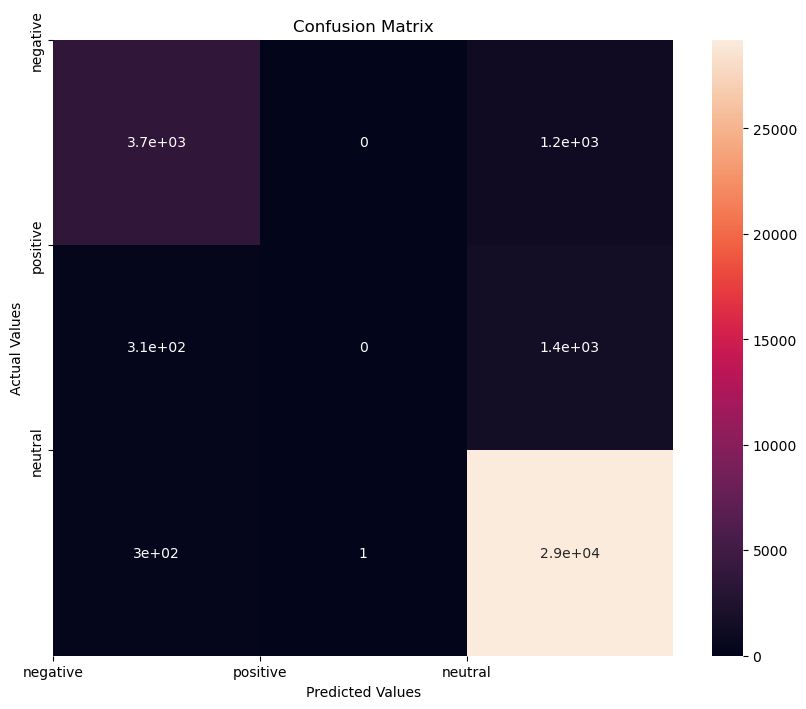

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

classes = ["negative", "positive", "neutral"]

#Plotting the confusion matrix
# Display confusion matrix as image

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.show()


# Naive Bayes Model

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model on the testing dataset
y_pred = nb_model.predict(X_test)

In [37]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9056159219425657
Precision: 0.6108350877285944
Recall: 0.5691171064477786
F1 Score: 0.5776566300763865


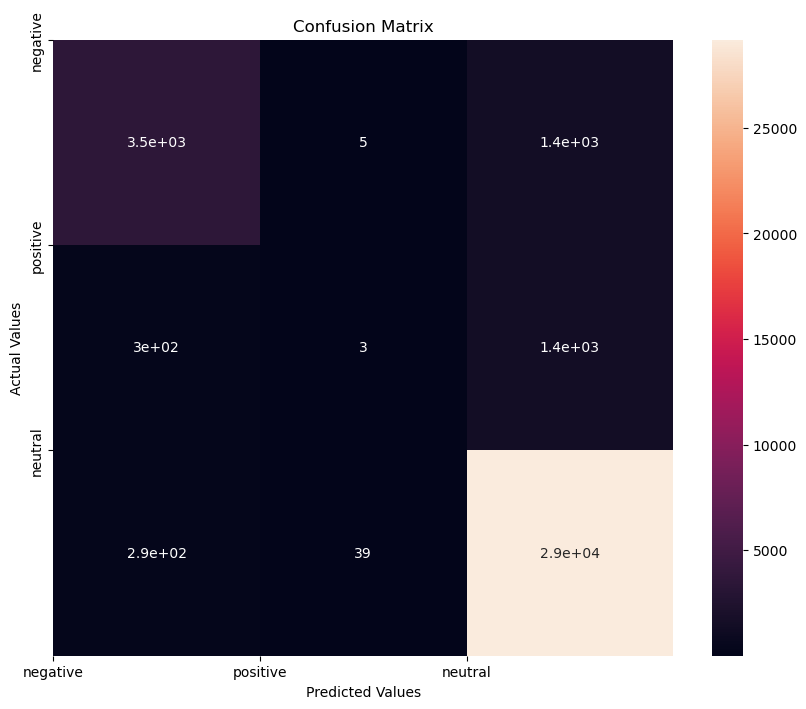

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

classes = ["negative", "positive", "neutral"]

#Plotting the confusion matrix
# Display confusion matrix as image

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.show()

# Random Forest Classifier Model

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert the text data into numerical vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on the testing set
y_pred = rf.predict(X_test_vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9114646856635991
Precision: 0.7592322250553524
Recall: 0.5813564270819364
F1 Score: 0.5859370564590082


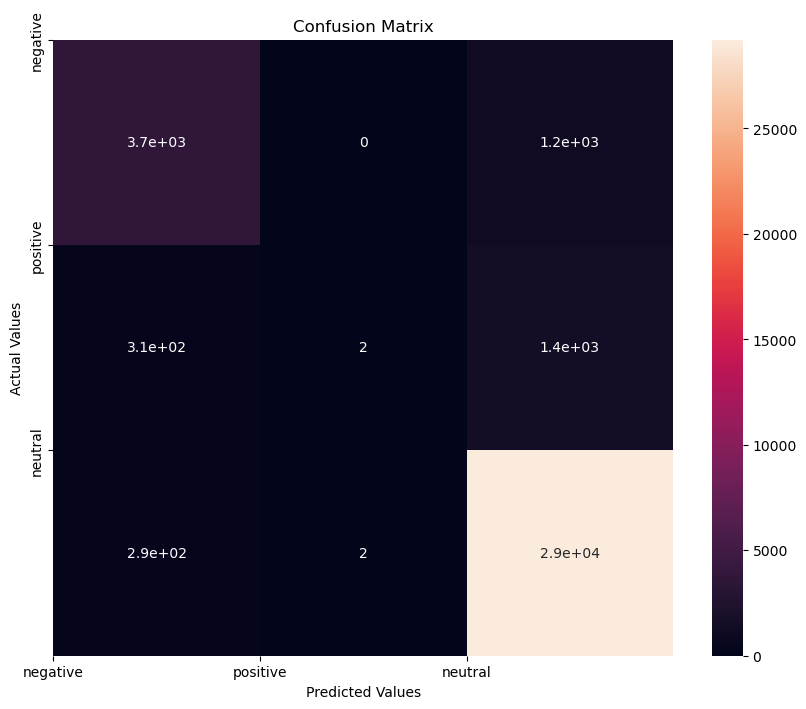

In [42]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

classes = ["negative", "positive", "neutral"]

#Plotting the confusion matrix
# Display confusion matrix as image

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.show()

# Now, Comparison of Model Performance

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [44]:

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest Classifier', RandomForestClassifier())
]
results = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Add the results to a list
    results.append([name, accuracy, precision, recall, f1])

In [47]:
# Create a table with box and lines to display the results
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table = tabulate(results, headers=headers, tablefmt="fancy_grid")
print(table)

# Plot the results as a grouped bar chart
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})

bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

╒══════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                    │   Accuracy │   Precision │   Recall │   F1 Score │
╞══════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression      │   0.911409 │    0.758841 │ 0.581505 │   0.585861 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Naive Bayes              │   0.905644 │    0.622326 │ 0.569499 │   0.578451 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest Classifier │   0.911437 │    0.759212 │ 0.581288 │   0.585888 │
╘══════════════════════════╧════════════╧═════════════╧══════════╧════════════╛


<Figure size 1000x600 with 0 Axes>

# Conclusion



It can be observed from the above table and graph that the Logistic Regression Model and the Random Forest Classifier Model and better than the Naive Bayes Model. However between the two Logistic Regression Model and Random Forest Classifier Model we see that both perform almost equally well for this dataset but the Random Forest Classifier Model is well suited for the Sentiment Analysis of Flipkart Reviews